## Importing Libraries

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## Variable Thresholding Based on Local Image Properties

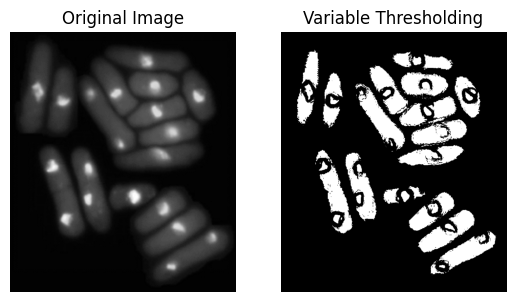

In [9]:
# loading the image
yeast = cv2.imread('yeast.tif')
yeast = cv2.cvtColor(yeast, cv2.COLOR_BGR2GRAY)

# defining windowsize
windowSize = 3

# defining constants for variable thresholding
a = 30
b = 1.5

# calculating the global mean
mG = np.mean(yeast.ravel())

# allocating memory for output image
yeast_segmented = np.zeros((yeast.shape[0], yeast.shape[1]))

# variable thresholding
for i in range(yeast.shape[0] - (windowSize - 1)):
  for j in range(yeast.shape[1] - (windowSize - 1)):
    # calculating threshold parameters
    m_xy = np.mean(yeast[i: i + windowSize, j: j + windowSize])
    std_xy = np.std(yeast[i: i + windowSize, j: j + windowSize])
    # threshold and the if condition below can be used interchangeably
    threshold = (a * std_xy) + (b * mG)

    if yeast[i, j] > (a * std_xy) and yeast[i, j] > (b * mG):
      yeast_segmented[i, j] = 1
    else:
      yeast_segmented[i, j] = 0

# displaying the results
plt.subplot(1, 2, 1); plt.axis('off'); plt.title('Original Image'); plt.imshow(yeast, 'gray')
plt.subplot(1, 2, 2); plt.axis('off'); plt.title('Variable Thresholding'); plt.imshow(yeast_segmented, 'gray')